# Bank marketing campaign data analysis

  In this project we will analyze marketing campaign data related to selling long term deposits of a bank from Portugal. We are going to use mathematicals models, Linear and Logistic Regression, not only to perform EDA but also to do predictive modeling (being the process of using data patterns to make predictions) between the features of the dataset and the outcome of the campaign.
  
  The data is from a marketing campaign of banking institution based on phone calls that were performed between May 2008 and November 2010. 

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, ks_2samp
import statsmodels.api as sm

In [5]:
data = pd.read_csv('C:/Users/VARGAS M/Desktop/Data Sets/Marketing Campaign/data/bank-additional/bank-additional-full.csv', sep=';')

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
(data.quantile(1)[['age','duration','campaign','previous']]/data.quantile(0.95)[['age','duration','campaign','previous']]-1)*100

age          68.965517
duration    553.424567
campaign    700.000000
previous    600.000000
dtype: float64

In [10]:
data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
numerical_variables = [i for i in data.columns if data[i].dtype != 'O']

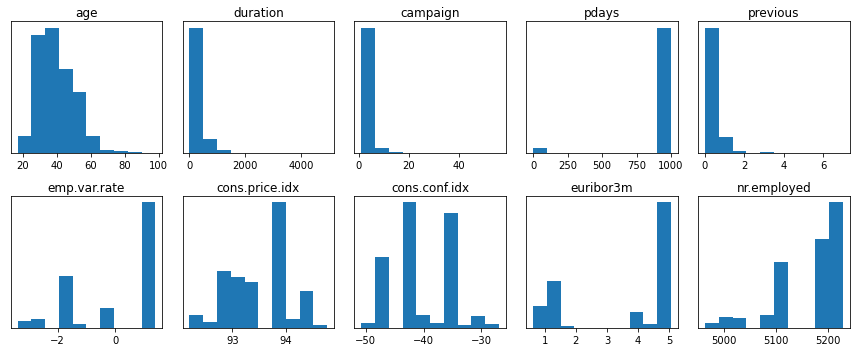

In [12]:
plt.figure(figsize=(12,5))
for index, col in enumerate(numerical_variables,1):
    plt.subplot(2, 5, index)
    plt.title(col, pad=5)
    plt.yticks([])
    plt.hist(data[col])
    plt.tight_layout()

A Violin Plot is used to visualise the distribution of the data and its probability density. This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data.

While a box plot only shows summary statistics such as median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal

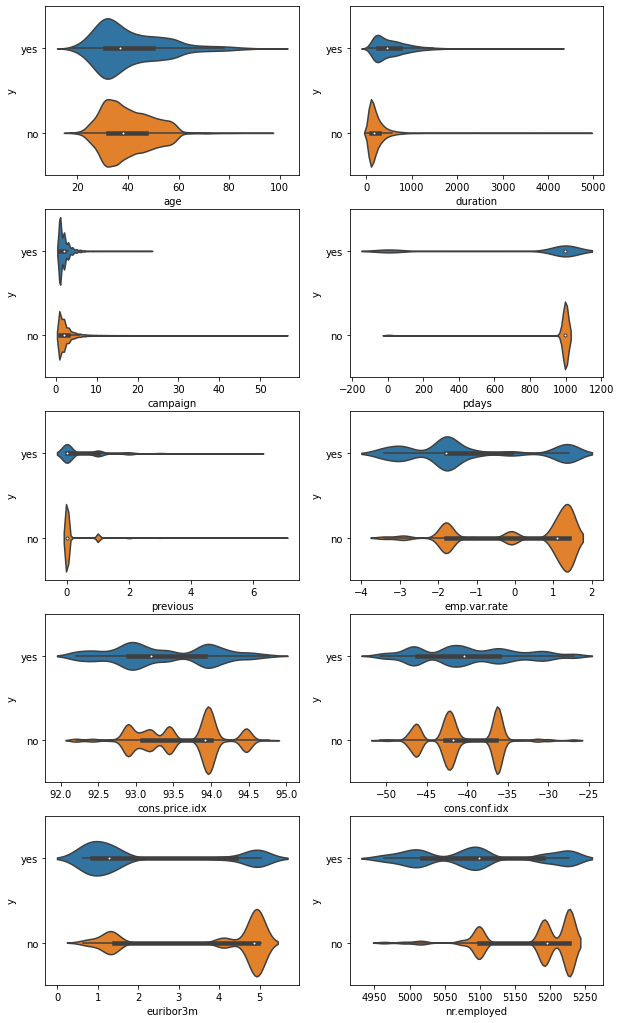

In [13]:
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_variables,1):
    plt.subplot(5, 2, index)
    sns.violinplot(x=col, y="y", data=data, order=["yes", "no"])

We'll perform an hypothesis test on each numerical variable to asses if there are statisticals differences on the mean and distributions between successful from unsuccessful marketing campaigns as it can be seen on the violin plots.

In [14]:
def hypotesis_test_mean_col(df, col):
    '''
    The test measures whether the average value differs significantly across samples
    '''
    yes_mean = df[(df['y'] == 'yes')][col].mean()
    no_mean = df[(df['y'] == 'no')][col].mean()
    test_result = ttest_ind(df[(df['y'] == 'yes')][col], df[(df['y'] == 'no')][col])
    return [col, yes_mean, no_mean, round(test_result[0],3), round(test_result[1],3)]

In [15]:
hypotesis_df = pd.DataFrame(columns=['column', 'yes_mean','no_mean','t-test','p-value'])

In [16]:
for index, col in enumerate(numerical_variables):
    hypotesis_df.loc[index] = hypotesis_test_mean_col(data, col)

In [17]:
hypotesis_df

,column,yes_mean,no_mean,t-test,p-value
0,age,40.913147,39.911185,6.172,0.0
1,duration,553.191164,220.844807,89.967,0.0
2,campaign,2.051724,2.633085,-13.497,0.0
3,pdays,792.035560,984.113878,-69.722,0.0
4,previous,0.492672,0.132374,48.003,0.0
5,emp.var.rate,-1.233448,0.248875,-63.434,0.0
6,cons.price.idx,93.354386,93.603757,-27.903,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.154,0.0
8,euribor3m,2.123135,3.811491,-65.647,0.0
9,nr.employed,5095.115991,5176.166600,-76.984,0.0


H0 = There is no statistical significance; p-value > 0.5

H1 = There is statistical significance ; p-value <= 0.5

As we can observe from the above table, we reject H0. This means that there are significant differences in the mean values for each column associated with succesful marketing campaigns from the unsuccesful campaigns

In [18]:
def hypotesis_test_dist_col(df, col):
    '''
    If we do not want to assume any particular parametric form 
    of the distributions (like, e.g., normal), we may choose non-parametric tests
    like the Wilcoxon test or the Kolmogorov-Smirnov test.
    This tests whether 2 samples are drawn from the same distribution.
    '''
    yes_values = df[(df['y'] == 'yes')][col]
    no_values = df[(df['y'] == 'no')][col]
    test_result = ks_2samp(yes_values, no_values)
    return [col, round(test_result[0],3), round(test_result[1],3)]

In [19]:
hypotesis_dist_test_df = pd.DataFrame(columns=['col','t-test','p-value'])

In [20]:
for index, col in enumerate(numerical_variables):
    hypotesis_dist_test_df.loc[index] = hypotesis_test_dist_col(data,col)

In [21]:
hypotesis_dist_test_df

,col,t-test,p-value
0,age,0.086,0.0
1,duration,0.464,0.0
2,campaign,0.081,0.0
3,pdays,0.193,0.0
4,previous,0.210,0.0
5,emp.var.rate,0.432,0.0
6,cons.price.idx,0.228,0.0
7,cons.conf.idx,0.200,0.0
8,euribor3m,0.433,0.0
9,nr.employed,0.432,0.0


H0 = There is no statistical significance; p-value > 0.5

H1 = There is statistical significance ; p-value <= 0.5

As we can observe from the above table, we reject H0. This means that there are significant differences in the distributions for each column associated with succesful marketing campaigns from the unsuccesful campaigns

Now, we are going to do pairplots between the numerical variables and divide these variables by the output of the marketing campaign

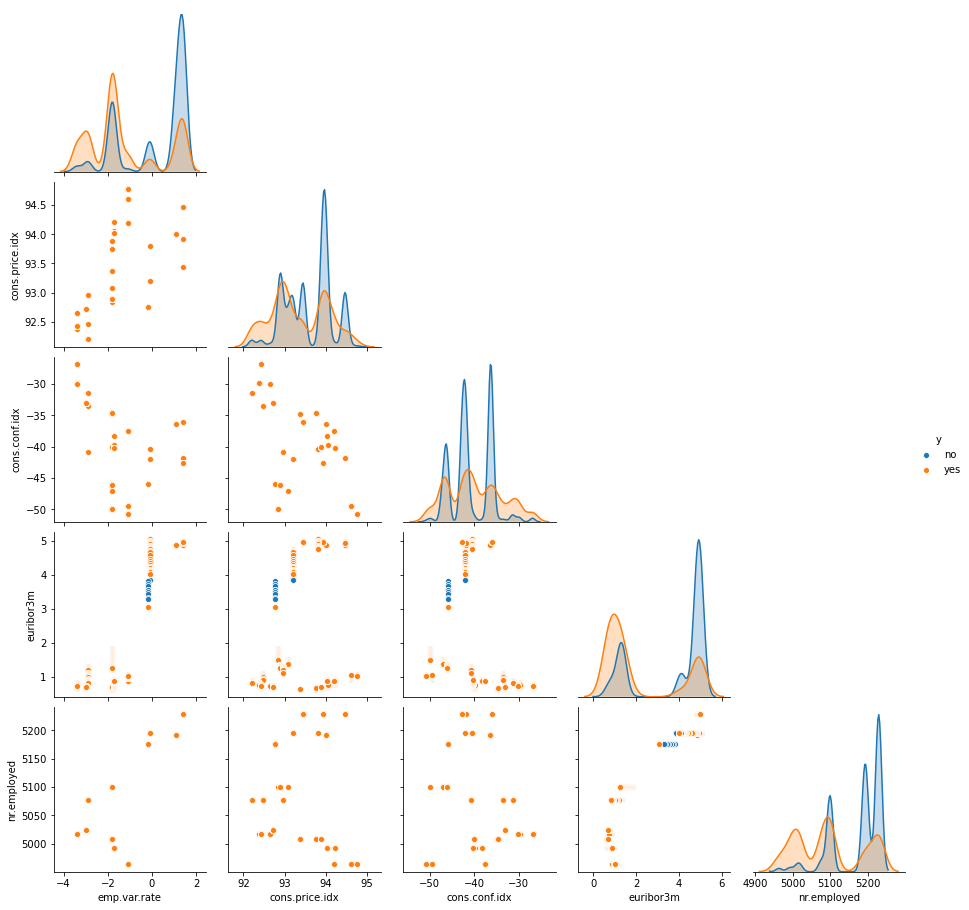

<Figure size 864x576 with 0 Axes>

In [22]:
sns.pairplot(data.iloc[:,15:],hue='y',corner=True)
plt.figure(figsize=(12,8))
plt.show()

In the above figure we have economic variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


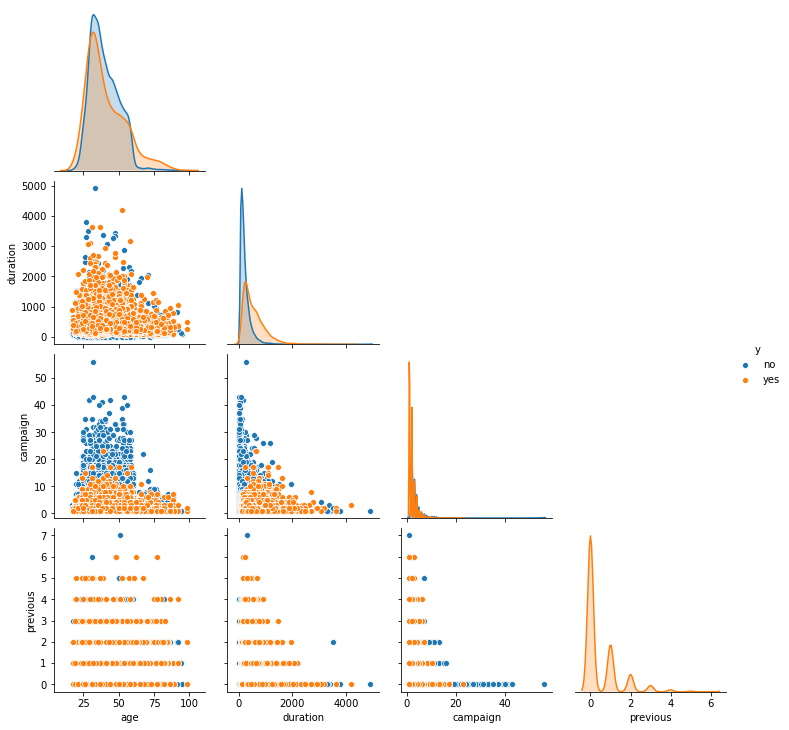

<Figure size 864x576 with 0 Axes>

In [23]:
sns.pairplot(data[['age','duration','campaign','previous','y']],hue='y',corner=True)
plt.figure(figsize=(12,8))
plt.show()

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g = sns.pairplot(iris)
g.map_upper(hide_current_axis)


In the above figure we have campaign-related features

Analysis of correlation between variables for successful and unsuccessful marketing campaign

In [24]:
corr_yes = data[data.y=='yes'].corr()
corr_no = data[data.y=='no'].corr()

In [80]:
corr_yes.style.background_gradient(cmap='coolwarm').set_precision(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000,-0.059,-0.008,-0.065,0.075,-0.082,-0.025,0.141,-0.085,-0.112
duration,-0.059,1.000,0.157,0.238,-0.232,0.503,0.238,-0.144,0.500,0.482
campaign,-0.008,0.157,1.000,0.107,-0.104,0.222,0.117,-0.043,0.212,0.203
pdays,-0.065,0.238,0.107,1.000,-0.729,0.281,-0.055,-0.170,0.365,0.453
previous,0.075,-0.232,-0.104,-0.729,1.000,-0.285,0.091,0.128,-0.392,-0.488
emp.var.rate,-0.082,0.503,0.222,0.281,-0.285,1.000,0.660,-0.267,0.926,0.788
cons.price.idx,-0.025,0.238,0.117,-0.055,0.091,0.660,1.000,-0.328,0.415,0.120
cons.conf.idx,0.141,-0.144,-0.043,-0.170,0.128,-0.267,-0.328,1.000,-0.120,-0.203
euribor3m,-0.085,0.500,0.212,0.365,-0.392,0.926,0.415,-0.120,1.000,0.922
nr.employed,-0.112,0.482,0.203,0.453,-0.488,0.788,0.120,-0.203,0.922,1.000


In [26]:
corr_no.style.background_gradient(cmap='coolwarm').set_precision(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000,0.001,0.008,-0.006,-0.003,0.027,0.011,0.125,0.041,0.018
duration,0.001,1.000,-0.083,-0.012,-0.004,0.003,0.018,0.004,0.006,-0.004
campaign,0.008,-0.083,1.000,0.026,-0.068,0.133,0.123,-0.007,0.115,0.126
pdays,-0.006,-0.012,0.026,1.000,-0.432,0.192,0.091,-0.034,0.199,0.242
previous,-0.003,-0.004,-0.068,-0.432,1.000,-0.425,-0.272,-0.139,-0.442,-0.463
emp.var.rate,0.027,0.003,0.133,0.192,-0.425,1.000,0.797,0.319,0.976,0.922
cons.price.idx,0.011,0.018,0.123,0.091,-0.272,0.797,1.000,0.152,0.731,0.594
cons.conf.idx,0.125,0.004,-0.007,-0.034,-0.139,0.319,0.152,1.000,0.393,0.208
euribor3m,0.041,0.006,0.115,0.199,-0.442,0.976,0.731,0.393,1.000,0.947
nr.employed,0.018,-0.004,0.126,0.242,-0.463,0.922,0.594,0.208,0.947,1.000


 From the above two correlations heatmaps, we can observe that 'employment variation rate', 'consumer price index' and 'euro libor 3 months' are positive correlated. A high positive 
 
 A positive correlation between the three previously mentioned variables, and high values of these variables are a clear indicator of an expanding economy, in which growing employment rates means more people with money, so there is more spending
and higher inflation. When this happens central banks, in order to control inflation, tend to increase interest rates. And vice versa in a contractionary economy.

 Another interesting fact is that the 'consumer confidence index' is postive correlated to the negative outcome and negatively correlated to the positive marketing campaign outcome.
 
 This means that when the overall sentiment about the economy is pesimistic and periods of recession, people tend to accept more products related to bank loans.

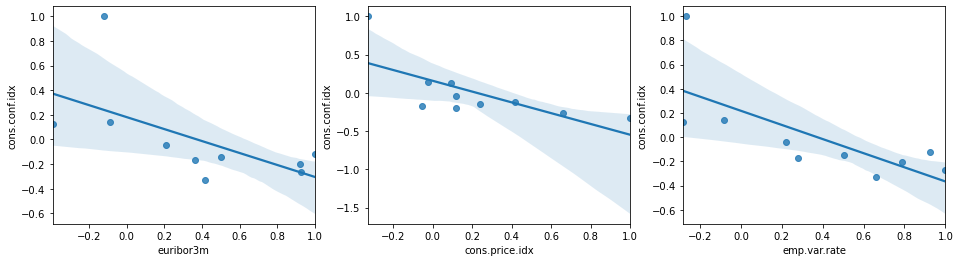

In [63]:
plt.figure(figsize=(16,4))
for index, cor in enumerate(['euribor3m','cons.price.idx','emp.var.rate'],1):
    plt.subplot(1, 3, index)
    sns.regplot(corr_yes[cor], corr_yes['cons.conf.idx'])

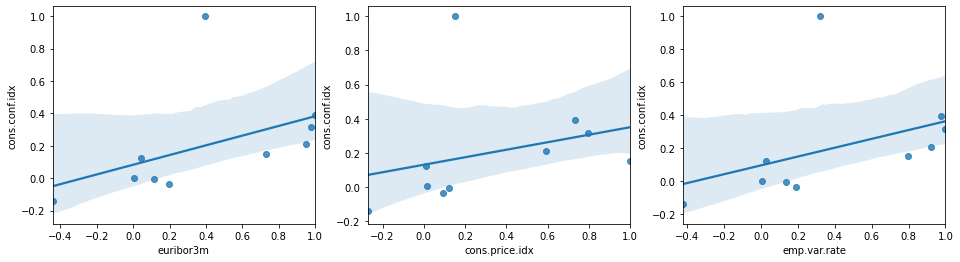

In [64]:
plt.figure(figsize=(16,4))
for index, cor in enumerate(['euribor3m','cons.price.idx','emp.var.rate'],1):
    plt.subplot(1, 3, index)
    sns.regplot(corr_no[cor], corr_no['cons.conf.idx'])

We are going to create a linear model to analyze 'cons.conf.idx' (continuous value) based on 'euribor3m', 'cons.price.idx' and 'emp.var.rate' features

In [72]:
# split data between target variable and predictors

X = data[['euribor3m','cons.price.idx','emp.var.rate']]
X= sm.add_constant(X)
y = data['cons.conf.idx']

In [75]:
lr_model = sm.OLS 

linear_regression_model = sm.OLS(y, X)
result = linear_regression_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          cons.conf.idx   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2960.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:08:09   Log-Likelihood:            -1.1753e+05
No. Observations:               41188   AIC:                         2.351e+05
Df Residuals:                   41184   BIC:                         2.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -82.4025      5.999    -13.

Statistics are provided by the summary. Some of the more importants ones are Adjusted R-quared (as it not only take into account the accuracy of the model but also takes into account its complexity), p-value and the coefficient of each predictor variable.

As p < 0.05 for each variable it means that all of them are statistically siginificat for predicting the target variable.

Looking at the coefficients column, we would have the following linear regression formula:

cons.conf.idx = -82.2042 + euroibor3m * 4.3582 + cons.price.idx * 0.2828 + emp.var.rate * -4.1814

The values of the coefficients are important as they indicate how much the dependent variable (cons.conf.idx) would change if we multilply one of them by 1 leaving the rest constant. Said this, the variable that has the major impact on y is euroibor3m with a positive correlation, then follows up emp.var.rate with a negative correlation, and finally cons.price.idx. 

Now we are going to analyze how all predictors influence the target variable. 

We'll start by doing a countplot for each categorical variable to gain knowledge of their distributions.

In [76]:
categorical_variables = [i for i in data.columns if data[i].dtype == 'O']

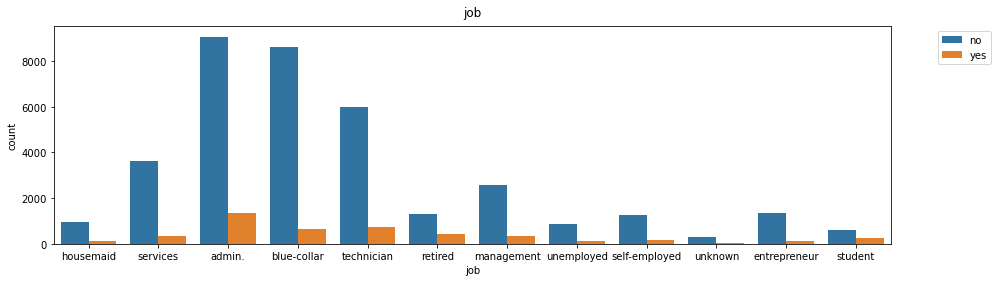

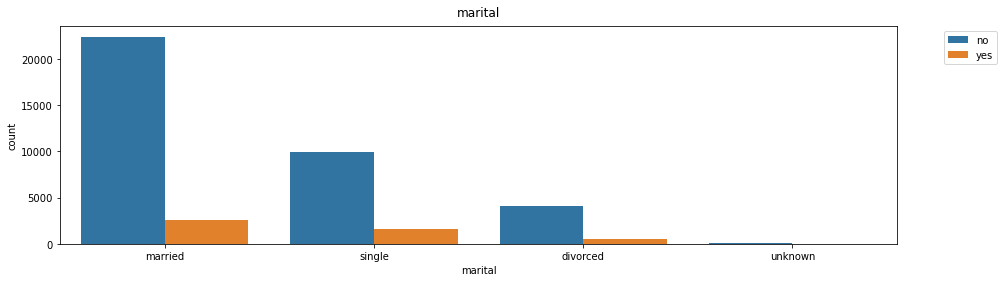

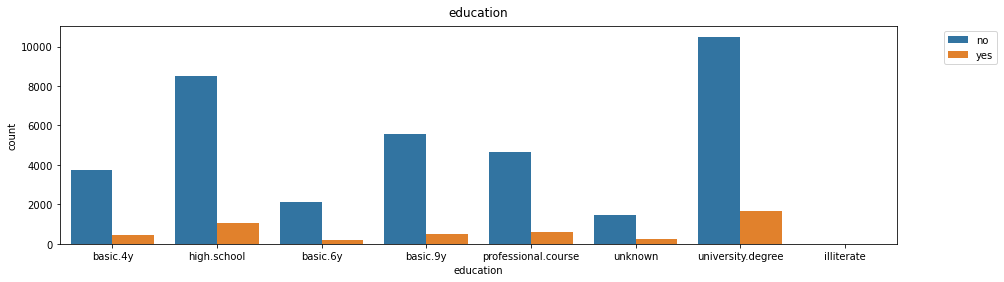

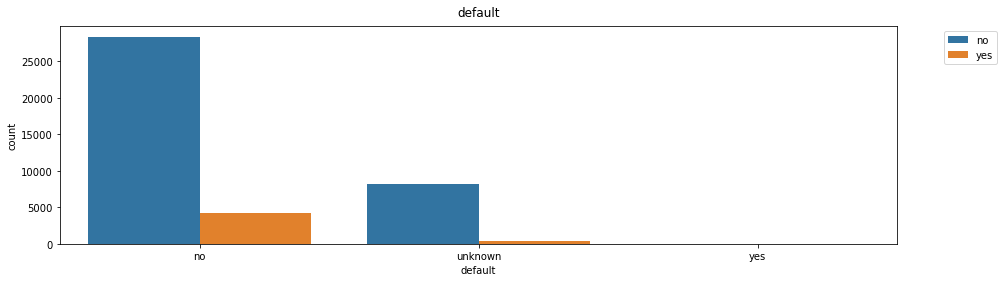

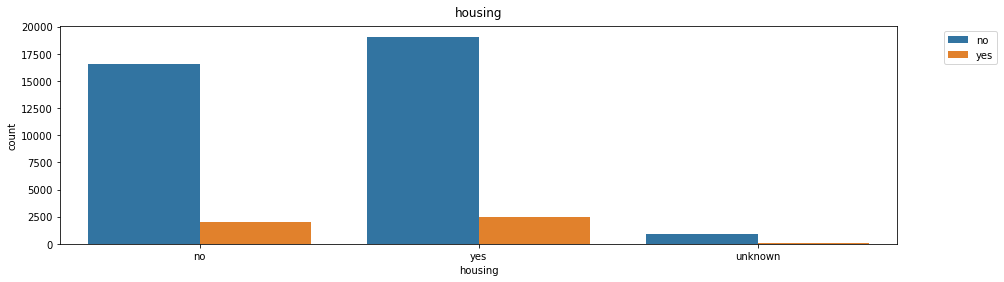

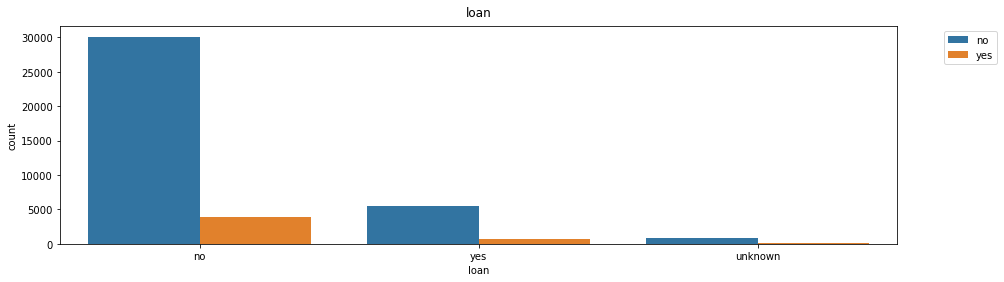

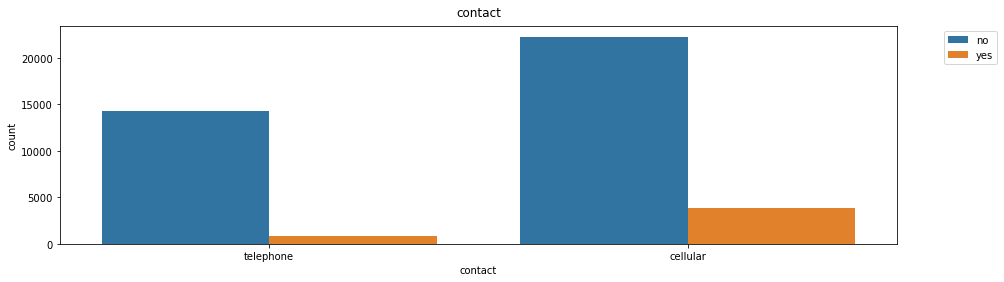

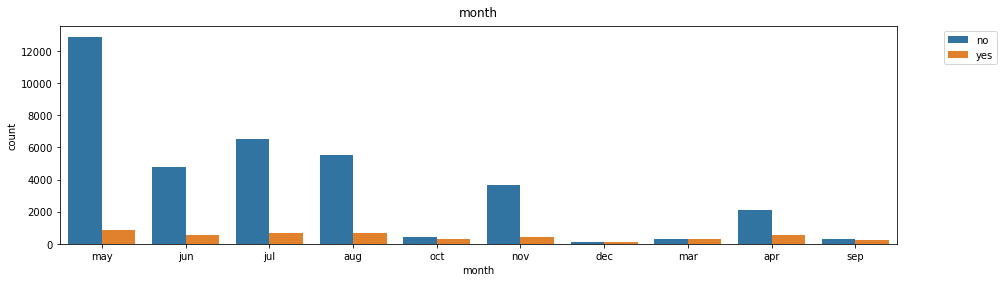

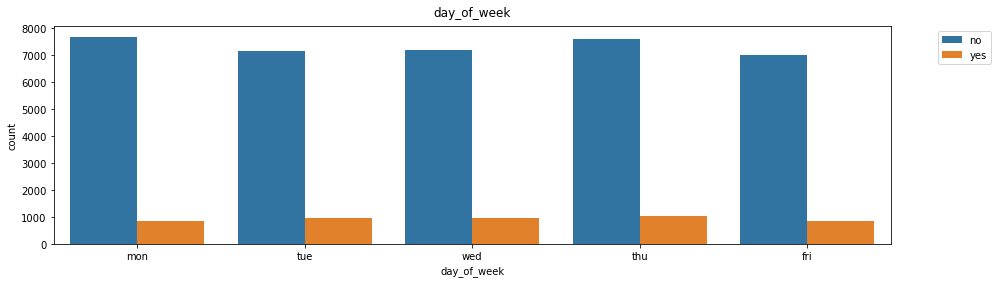

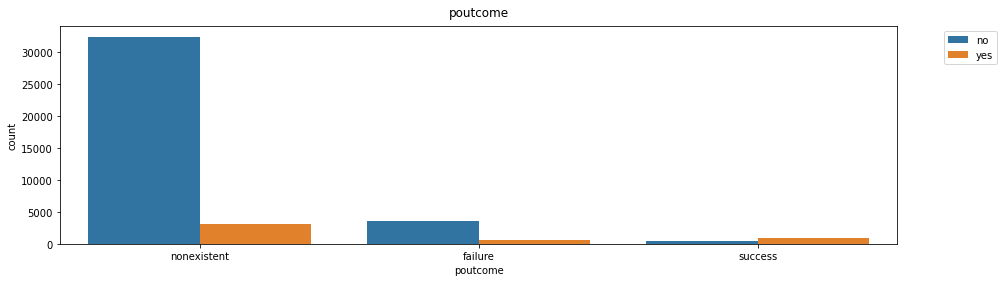

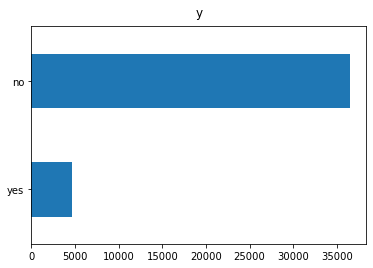

In [77]:
for i in categorical_variables:
    if i !='y':
        plt.figure(figsize=(15,4))
        plt.title(i, pad=10)
        sns.countplot(data[i], hue=data.y)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
    else:
        plt.title('y', pad=10)
        data.y.value_counts().sort_values().plot.bar()
        plt.show()

In [78]:
print('Percentage of each outcome in the dateset:\n{}'.format(data.y.value_counts()/len(data)*100))

Percentage of each outcome in the dateset:
no     88.734583
yes    11.265417
Name: y, dtype: float64


We can easily notice that the dataset is imbalanced, so if we wanted to do predictive modeling, we should first balance the dataset (there are many techniques such as undersample, oversample, SMOTE, etc) so that the model we use can learn the relationships in our data, and then use that model to predict on new data.

In [1]:
# Encode the target variable
    
data['y'] = data.y.map({'no':0,'yes':1})

NameError: name 'data' is not defined

In [103]:
# Convert categorical data into numbers
X_full = pd.get_dummies(data.drop(['y'], axis=1))
X_full = sm.add_constant(X_full)

# Define target variable
y = data.y

In [108]:
logistic_regression_model = sm.Logit(y, X_full)
result = logistic_regression_model.fit(maxiter=300)
print(result.summary())

         Current function value: 0.207316
         Iterations: 300


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41135
Method:                           MLE   Df Model:                           52
Date:                Fri, 15 Jan 2021   Pseudo R-squ.:                  0.4111
Time:                        06:56:58   Log-Likelihood:                -8538.9
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -68.7433        nan        nan        nan         nan         nan
age                               0.0002      0.002      0.081      0.936 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Not only we have lot of columns in the previous model, but also we can see that there are a lot of redundants columns (p > 0.05), this means that we cannot reject the null hypothesis for those variables. Feature selection should be applied, there are differents methods such as model-based (Lasso, Decision Tree, etc.), univariate statistics (in this case ANOVA could be used) and iterative models.

We are going to do a feature matrix choosing the variables with a p-value smaller than 0.05.

In [176]:
X_selected = X_full[['const','duration','campaign','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']]
X_selected.head()

,const,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,1.0,261,1,999,1.1,93.994,-36.4,4.857
1,1.0,149,1,999,1.1,93.994,-36.4,4.857
2,1.0,226,1,999,1.1,93.994,-36.4,4.857
3,1.0,151,1,999,1.1,93.994,-36.4,4.857
4,1.0,307,1,999,1.1,93.994,-36.4,4.857


In [177]:
X_selected.shape

(41188, 8)

In [178]:
logistic_regression_model_selected = sm.Logit(y, X_selected)
result_selected = logistic_regression_model_selected.fit(maxiter=300)
print(result_selected.summary())

Optimization terminated successfully.
         Current function value: 0.220751
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41180
Method:                           MLE   Df Model:                            7
Date:                Fri, 15 Jan 2021   Pseudo R-squ.:                  0.3729
Time:                        07:56:53   Log-Likelihood:                -9092.3
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -90.4650      5.683    -15.919      0.000    -101.603     -79.327
duration         

Although this model has lower pseudo R-quared than the previous model with more features, it is important to remark that not always is better to have such a complex model as it can lead to overfitting, and even more if we are trying to explain the variables that influence our target variable.

Said this, the explicit equation derived from our final model is:

    P(y = no) = 1 / (1 + e ** -(-90.4650 + 0.0045 * duration - 0.0432 * campaign - 0.0016 * pdays - 0.7114 * emp.var.rate + 0.9698 * cons.price.idx + 0.0513 * cons.conf.idx - 0.1996 * euribor3m)) 

In conclusion, the variables that most influence 'y' in descending order are:
- cons.price.idx
- emp.var.rate
- euribor3m
- cons.conf.idx
- campaign
- duration
- pdays